<a href="https://colab.research.google.com/github/allnes/age_classifier/blob/master/exp_may/pga_random_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
age_classifier	LICENSE.txt  rcv1.ipynb        summaries
checkpoints	makefile     README.md	       trials
lib		nips2016     requirements.txt  usage.ipynb
From https://github.com/allnes/cnn_graph
 * branch            graph_train -> FETCH_HEAD
Already up to date.
['arr_0', 'arr_1']
(729, 16384)
(729,)
--> Reshape data


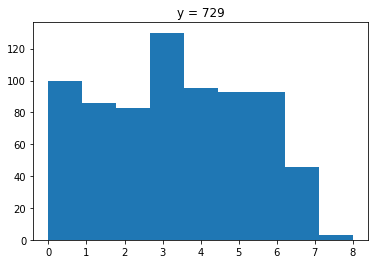

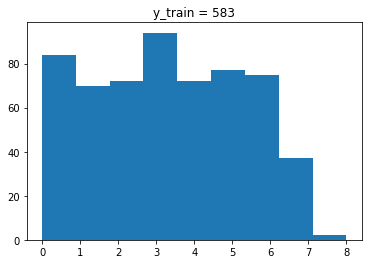

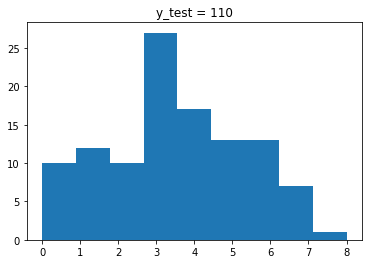

[0 1 2 3 4 5 6 7 8]
--> Get distance graph
d = |V| = 128, k|V| < |E| = 110418


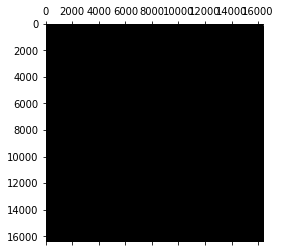

--> Get laplacian matrix
Layer 0: M_0 = |V| = 33296 nodes (16912 added),|E| = 55209 edges
Layer 1: M_1 = |V| = 16648 nodes (7412 added),|E| = 28968 edges
Layer 2: M_2 = |V| = 8324 nodes (2142 added),|E| = 21003 edges
Layer 3: M_3 = |V| = 4162 nodes (0 added),|E| = 14707 edges
(583, 33296)
(36, 33296)
(110, 33296)
NN architecture
  input: M_0 = 33296
  layer 1: cgconv1
    representation: M_0 * F_1 / p_1 = 33296 * 32 / 4 = 266368
    weights: F_0 * F_1 * K_1 = 1 * 32 * 16 = 512
    biases: M_1 * F_1 = 33296 * 32 = 1065472
  layer 2: cgconv2
    representation: M_1 * F_2 / p_2 = 8324 * 32 / 2 = 133184
    weights: F_1 * F_2 * K_2 = 32 * 32 * 16 = 16384
    biases: M_2 * F_2 = 8324 * 32 = 266368
  layer 3: fc1
    representation: M_3 = 2000
    weights: M_2 * M_3 = 133184 * 2000 = 266368000
    biases: M_3 = 2000
  layer 4: logits (softmax)
    representation: M_4 = 9
    weights: M_3 * M_4 = 2000 * 9 = 18000
    biases: M_4 = 9
step 100 / 1166 (epoch 2.74 / 32):
  learning_rate = 9.03e-0

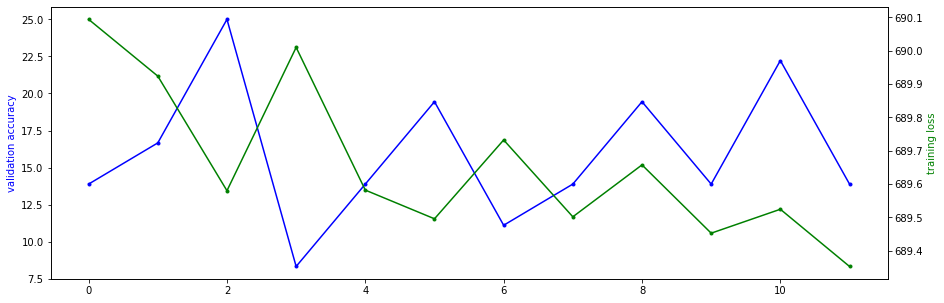

Time per step: 985.24 ms
(110, 33296) (110,)
############ Class 0
(10, 33296)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 60.00 (6 / 10), f1 (weighted): 75.00, loss: 8.26e+02
time: 5s (wall 2s)
############ Class 1
(12, 33296)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 25.00 (3 / 12), f1 (weighted): 40.00, loss: 6.90e+02
time: 5s (wall 1s)
############ Class 2
(10, 33296)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 10.00 (1 / 10), f1 (weighted): 18.18, loss: 8.27e+02
time: 5s (wall 1s)
############ Class 3
(27, 33296)
INFO:tensorflow:Restoring parameters from /content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/lib/../checkpoints/demo/model-1166
accuracy: 18.52 (5 / 27), f1 (weighted): 31.25, loss:

In [5]:
%tensorflow_version 1.x

from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DL_DATA_GRAPH/BUILD/cnn_graph/')
!ls

# !git clone https://github.com/mdeff/cnn_graph
# !git status
# !git fetch
# !git checkout graph_train
!git pull origin graph_train


%run age_classifier/age_classes_coarsening \
  --path_project='/content/drive/My Drive/DL_DATA_GRAPH/' \
  --path_data='NEW/converted_data_resize_875_pga_random_128.npz' \
  --zip_size=128

%matplotlib inline